# Deaths and Births

To reproduce this example, you need to register to Insee’s API and
configure `pynsee`. Go check [Section 1.3](#sec-config) for details.

## Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from pynsee.macrodata import get_dataset_list, get_series_list, get_series

## Feature engineering

In [3]:
insee_data = get_dataset_list()

df_idbank = get_series_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_series(df_idbank.IDBANK)

Getting datasets list:   0%|          | 0/199 [00:00<?, ?it/s]

Getting datasets list:  60%|██████    | 120/199 [00:00<00:00, 1195.24it/s]

Getting datasets list: 100%|██████████| 199/199 [00:00<00:00, 1221.87it/s]

1/1 - Getting series:   0%|          | 0/2 [00:00<?, ?it/s]

1/1 - Getting series:  50%|█████     | 1/2 [00:01<00:01,  1.10s/it]

1/1 - Getting series: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

1/1 - Getting series: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


Data has been cached


In [4]:
data['period'] = pd.cut(
  pd.to_datetime(data['DATE']),
  bins = pd.to_datetime(
    ['1946-01-01', '1975-01-01', '2000-01-01', pd.Timestamp.today().normalize()]),
  labels = ['1946-1975','1975-2000','2000-today']
    )

conditions = [data.IDBANK=="000436391", data.IDBANK=="000436394"]
values = ["Births", "Deaths"]
data['color'] = np.select(conditions, values)

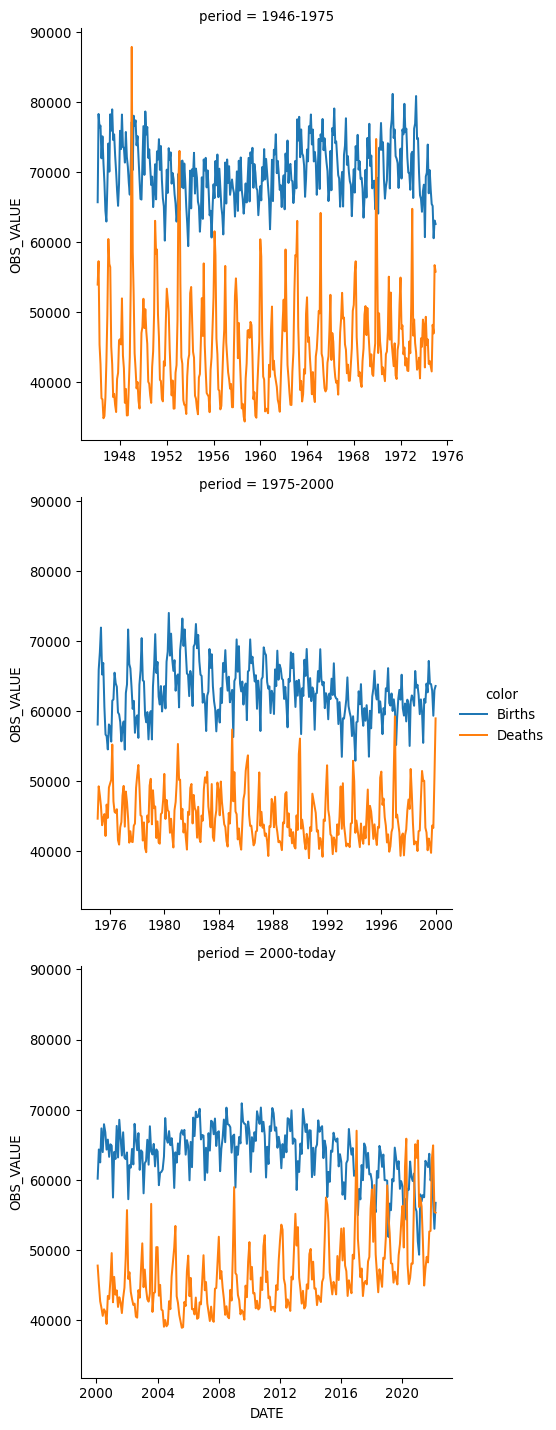

In [5]:
sns.relplot(
    data=data,
    x = "DATE", y = "OBS_VALUE",
    hue="color", row="period",
    kind="line", 
    facet_kws=dict(sharex=False),
)

## Prerequisite

-   Subscribe to https://api.insee.fr/catalogue/ and get your
    credentials!
-   Save your credentials with `init_conn` function :

In [6]:
# Initialize key
from pynsee.utils.init_conn import init_conn
init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

-   Beware : any change to the keys should be tested after having
    cleared the cache

In [7]:
# clear registered keys
from pynsee.utils import clear_all_cache; clear_all_cache()